In [67]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

#Creating a DF for Delhi
grouped_df = df.groupby('City')
category_dfs = {name: group for name, group in grouped_df}
df_Ahmedabad = category_dfs['Ahmedabad']

#Checking the missing values percentage for each column in the DF for Delhi
missing_values_table(df_Ahmedabad) #Check if any column has 100 percent missing values. If a column like this exists then it is considered not significant in AQI calculation.

#Drop the column which has 100% missing values
#df_Delhi=df_Delhi.drop(columns=[column_name])

#HYPOTHESIS TESTING FOR PM10
#Checking the influence of a column on the AQI of Delhi - Example PM10
#Drop all rows in which the PM10 values are missing
df_Ahmedabad_PM10 = df_Delhi.dropna(subset=['PM10'])

#Drop the columns - City, Date, and AQI_Bucket and fill all NA values with 0, to build a Linear Regression Model
df_Ahmedabad_PM10=df_Ahmedabad_PM10.drop(columns = ['City', 'Date', 'AQI_Bucket'])
df_Ahmedabad_PM10=df_Ahmedabad_PM10.fillna(0)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=df_Ahmedabad_PM10[List of 'x column names']
Y=df_Ahmedabad_PM10['y column name']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

#Preparation for Hypothesis Testing
import statsmodels.api as sm

# Add a constant term to the features for the statsmodels model
X_train_with_const = sm.add_constant(X_train)

# Fit a linear regression model using statsmodels
model_statsmodels = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary of the model
print(model_statsmodels.summary())

#Perform the Hypothesis Test
# Define the hypothesis matrix
hypothesis_matrix = 'PM10 = 0'

# Perform the Wald test
wald_test_result = model_statsmodels.wald_test(hypothesis_matrix)

# Print the Wald test result
print("Wald Test Results:")
print(wald_test_result)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3354142231.py, line 52)

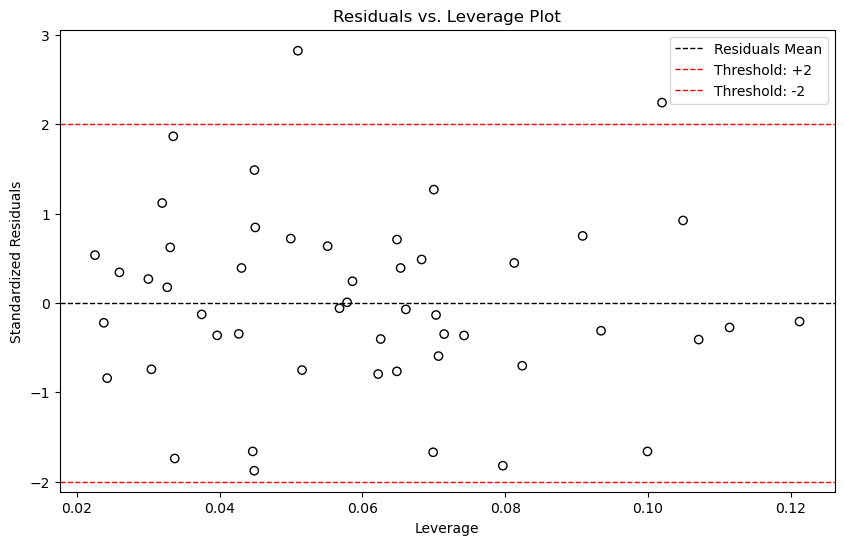

In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50, 2)
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.normal(0, 1, 50)

# Fit a linear regression model
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept).fit()

# Get model diagnostics
influence = OLSInfluence(model)
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Create Residuals vs. Leverage plot
plt.figure(figsize=(10, 6))
plt.scatter(leverage, standardized_residuals, edgecolors='k', facecolors='none')
plt.title('Residuals vs. Leverage Plot')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='Residuals Mean')
plt.axhline(y=2, color='red', linestyle='--', linewidth=1, label='Threshold: +2')
plt.axhline(y=-2, color='red', linestyle='--', linewidth=1, label='Threshold: -2')
plt.legend()
plt.show()


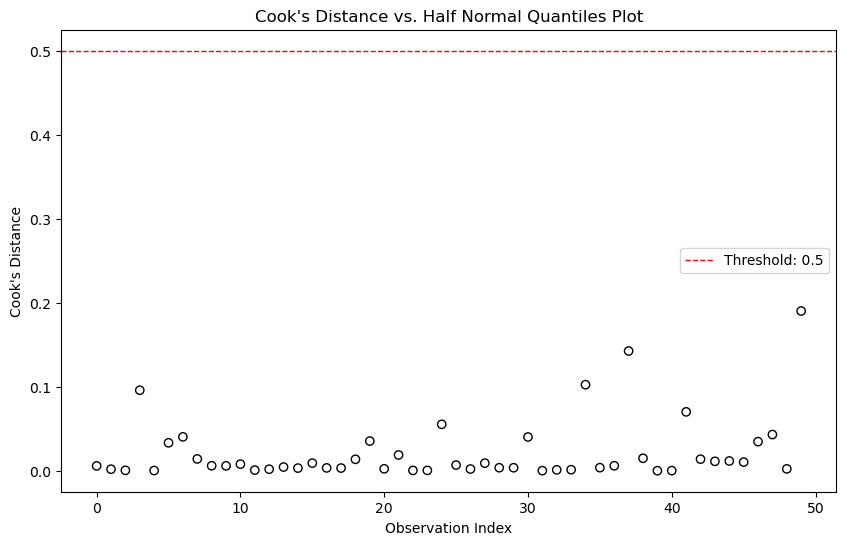

In [66]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50, 2)
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.normal(0, 1, 50)

# Fit a linear regression model
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept).fit()

# Get Cook's Distance values
influence = OLSInfluence(model)
cooks_distance = influence.cooks_distance[0]

# Create Cook's Distance vs. Half Normal Quantiles plot
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(cooks_distance)), cooks_distance, edgecolors='k', facecolors='none')
plt.title("Cook's Distance vs. Half Normal Quantiles Plot")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1, label='Threshold: 0.5')
plt.legend()
plt.show()


In [65]:
!pip install missingno

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import numpy as np

import random as rd
import scipy
import scipy.stats as stats

In [17]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.920,18.220,17.150,NaN,0.920,27.640,133.360,0.000,0.020,0.000,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.970,15.690,16.460,NaN,0.970,24.550,34.060,3.680,5.500,3.770,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.400,19.300,29.700,NaN,17.400,29.070,30.700,6.800,16.400,2.250,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.700,18.480,17.970,NaN,1.700,18.590,36.080,4.430,10.140,1.000,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.100,21.420,37.760,NaN,22.100,39.330,39.310,7.010,18.890,2.780,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020,50.940,7.680,25.060,19.540,12.470,0.470,8.550,23.300,2.240,12.070,0.730,41.000,Good
29527,Visakhapatnam,2020-06-28,24.380,74.090,3.420,26.060,16.530,11.990,0.520,12.720,30.140,0.740,2.210,0.380,70.000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910,65.730,3.450,29.530,18.330,10.710,0.480,8.420,30.960,0.010,0.010,0.000,68.000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640,49.970,4.050,29.260,18.800,10.030,0.520,9.840,28.300,0.000,0.000,0.000,54.000,Satisfactory


In [18]:
#summary
print(df.info())
print('\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


          PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
count 24933.00

In [19]:
# Check for rows with all null values
null_rows = df[df.isnull().all(axis=1)]

# Display the rows with all null values
print("Rows with all null values:")
print('\n')
print(null_rows)

Rows with all null values:


Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket]
Index: []


In [20]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Print the DataFrame with duplicate rows
print("Original DataFrame:")
print(df)

# Print the DataFrame without duplicate rows
print("\nDataFrame without Duplicate Rows:")
print(df[~duplicate_rows])

Original DataFrame:
                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN  0.920 18.220 17.150    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN  0.970 15.690 16.460    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN 17.400 19.300 29.700    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN  1.700 18.480 17.970    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN 22.100 21.420 37.760    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27 15.020 50.940  7.680 25.060 19.540 12.470   
29527  Visakhapatnam  2020-06-28 24.380 74.090  3.420 26.060 16.530 11.990   
29528  Visakhapatnam  2020-06-29 22.910 65.730  3.450 29.530 18.330 10.710   
29529  Visakhapatnam  2020-06-30 16.640 49.970  4.050 29.260 18.800 10.030   
29530  Visakhapatnam  2020-07-01 15.000 66.000  0.400 26.850 14.050  5.200   

          CO    SO2      O3  Benzene  Tolue

In [22]:
unique_rows = df[df.duplicated(keep='first') == True]
print(unique_rows)

Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket]
Index: []


In [24]:
#Eliminating all rows in which the AQI value is null, as it is the Predicted Variable
df=df.dropna(subset=['AQI'])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.130,NaN,6.930,28.710,33.720,NaN,6.930,49.520,59.760,0.020,0.000,3.140,209.000,Poor
29,Ahmedabad,2015-01-30,79.840,NaN,13.850,28.680,41.080,NaN,13.850,48.490,97.070,0.040,0.000,4.810,328.000,Very Poor
30,Ahmedabad,2015-01-31,94.520,NaN,24.390,32.660,52.610,NaN,24.390,67.390,111.330,0.240,0.010,7.670,514.000,Severe
31,Ahmedabad,2015-02-01,135.990,NaN,43.480,42.080,84.570,NaN,43.480,75.230,102.700,0.400,0.040,25.870,782.000,Severe
32,Ahmedabad,2015-02-02,178.330,NaN,54.560,35.310,72.800,NaN,54.560,55.040,107.380,0.460,0.060,35.610,914.000,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020,50.940,7.680,25.060,19.540,12.470,0.470,8.550,23.300,2.240,12.070,0.730,41.000,Good
29527,Visakhapatnam,2020-06-28,24.380,74.090,3.420,26.060,16.530,11.990,0.520,12.720,30.140,0.740,2.210,0.380,70.000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910,65.730,3.450,29.530,18.330,10.710,0.480,8.420,30.960,0.010,0.010,0.000,68.000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640,49.970,4.050,29.260,18.800,10.030,0.520,9.840,28.300,0.000,0.000,0.000,54.000,Satisfactory


Distribution Analysis

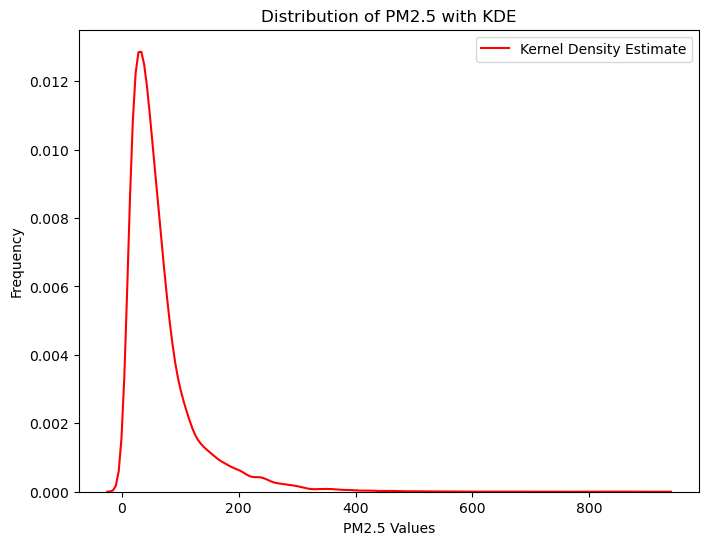

In [25]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['PM2.5'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of PM2.5 with KDE')
plt.xlabel('PM2.5 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

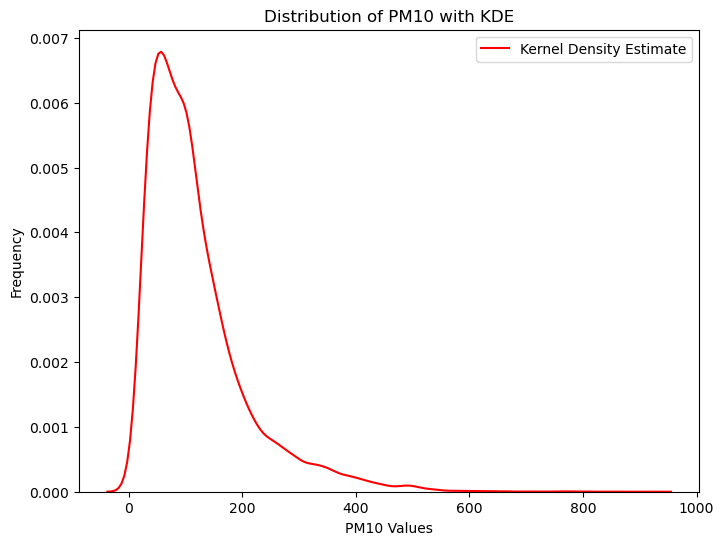

In [26]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['PM10'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of PM10 with KDE')
plt.xlabel('PM10 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

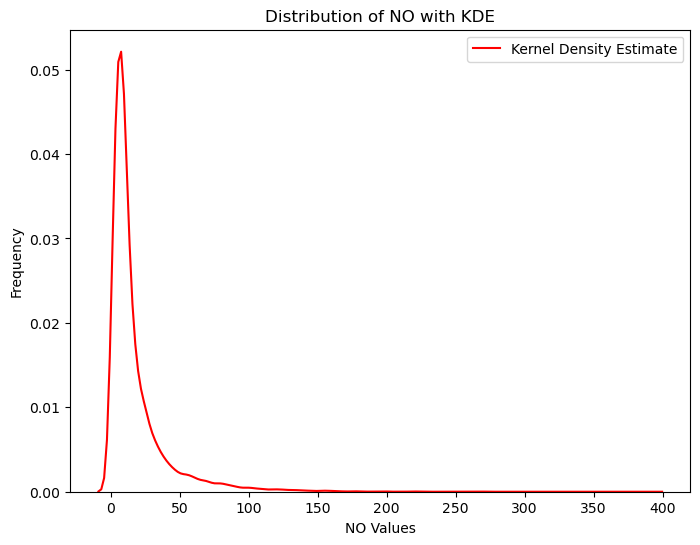

In [27]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['NO'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of NO with KDE')
plt.xlabel('NO Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

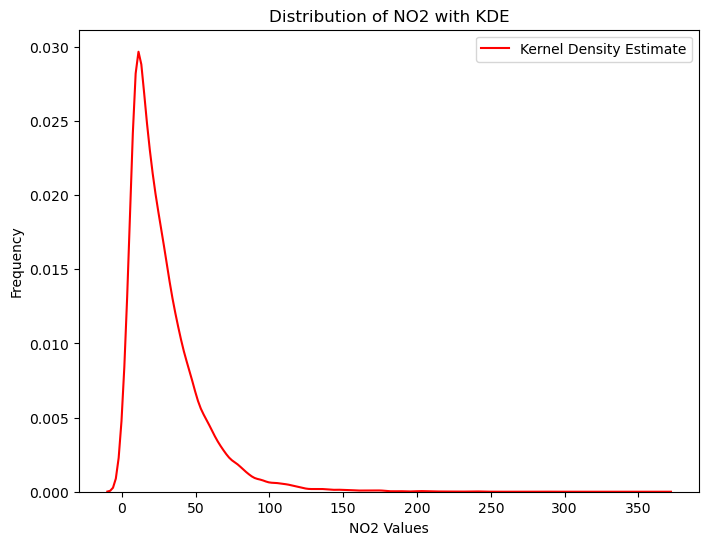

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['NO2'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of NO2 with KDE')
plt.xlabel('NO2 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

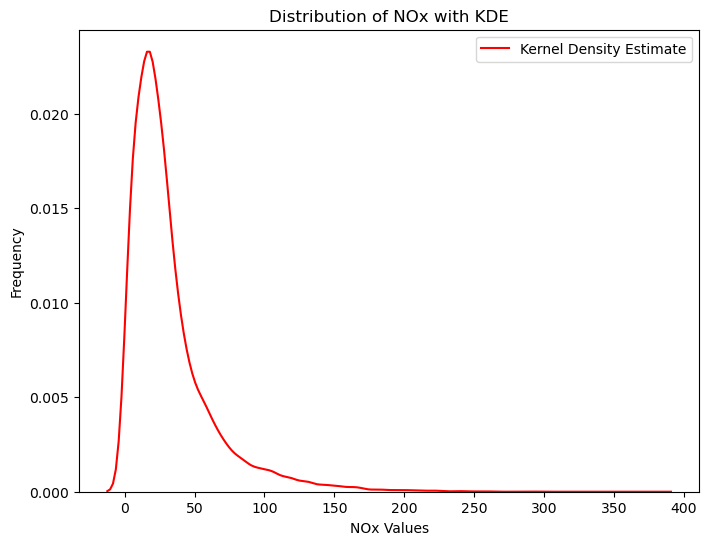

In [29]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['NOx'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of NOx with KDE')
plt.xlabel('NOx Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

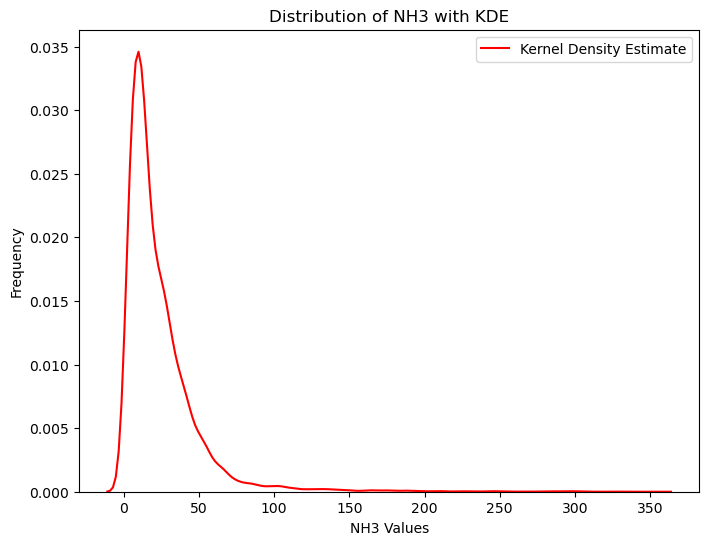

In [30]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['NH3'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of NH3 with KDE')
plt.xlabel('NH3 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

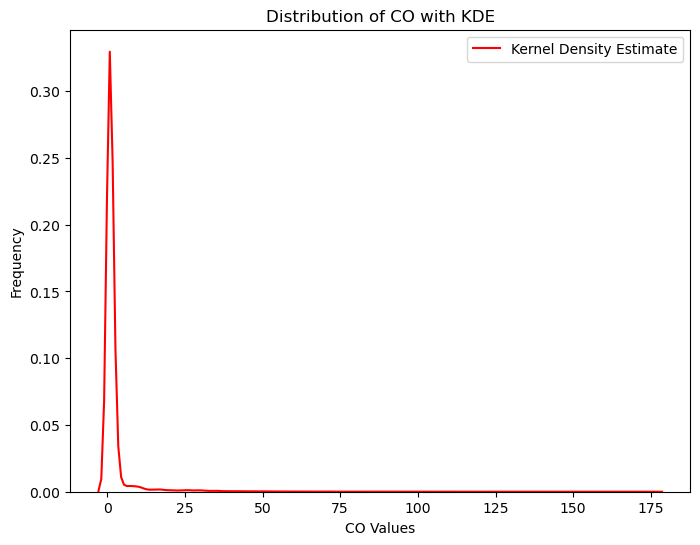

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['CO'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of CO with KDE')
plt.xlabel('CO Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

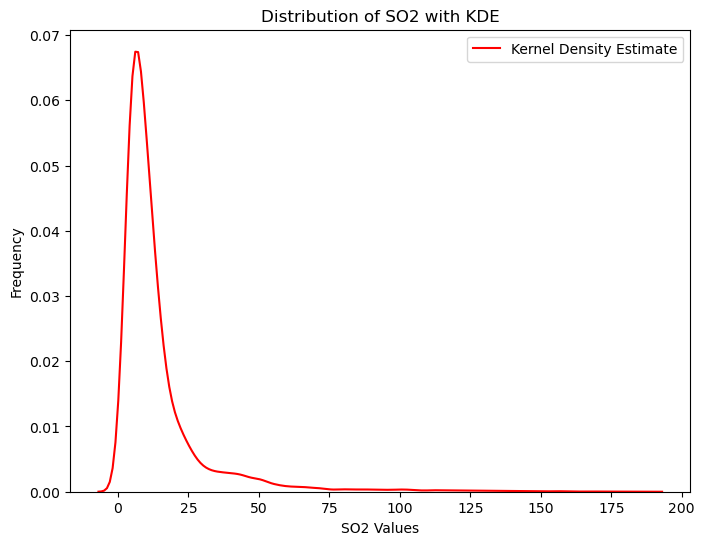

In [32]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['SO2'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of SO2 with KDE')
plt.xlabel('SO2 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

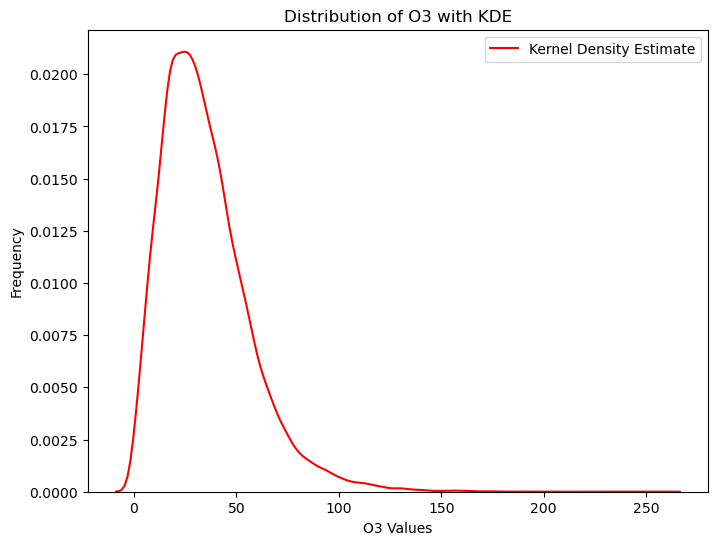

In [33]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['O3'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of O3 with KDE')
plt.xlabel('O3 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

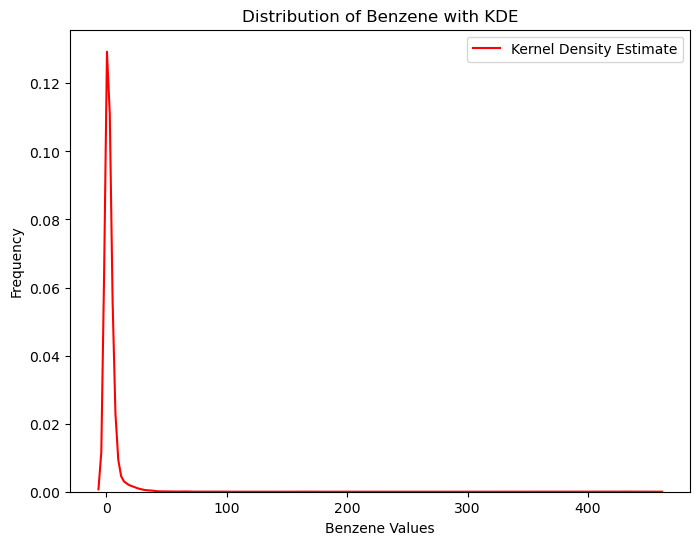

In [34]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Benzene'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of Benzene with KDE')
plt.xlabel('Benzene Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

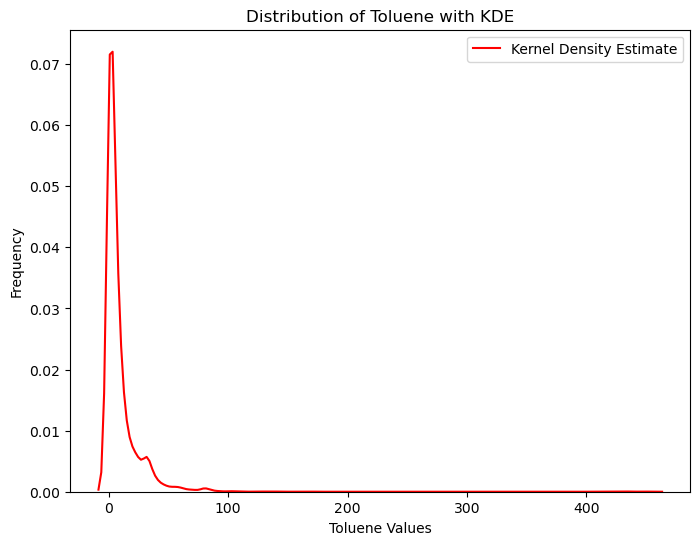

In [35]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Toluene'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of Toluene with KDE')
plt.xlabel('Toluene Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

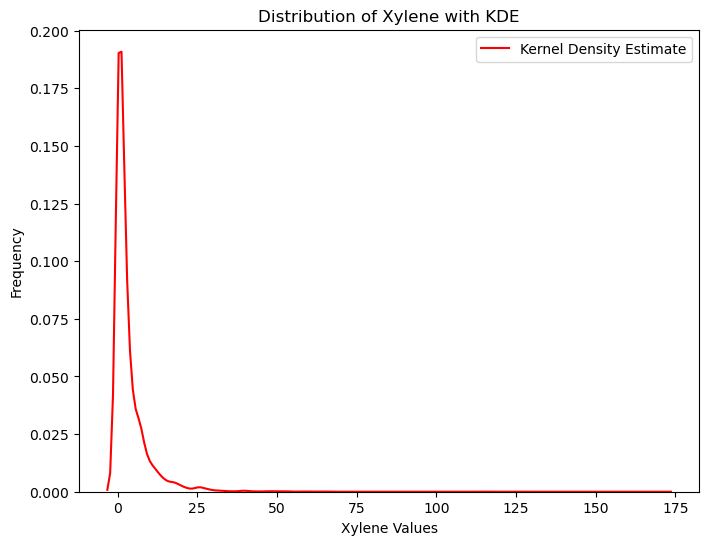

In [36]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Xylene'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of Xylene with KDE')
plt.xlabel('Xylene Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

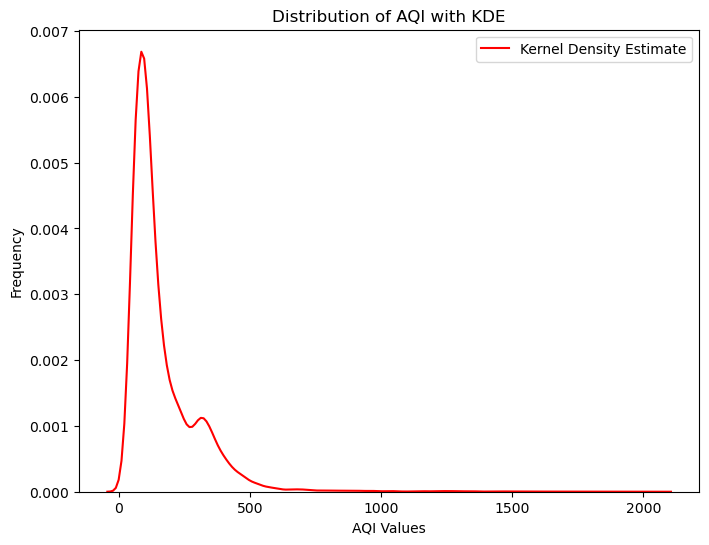

In [37]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['AQI'], color='red', label='Kernel Density Estimate')
plt.title('Distribution of AQI with KDE')
plt.xlabel('AQI Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

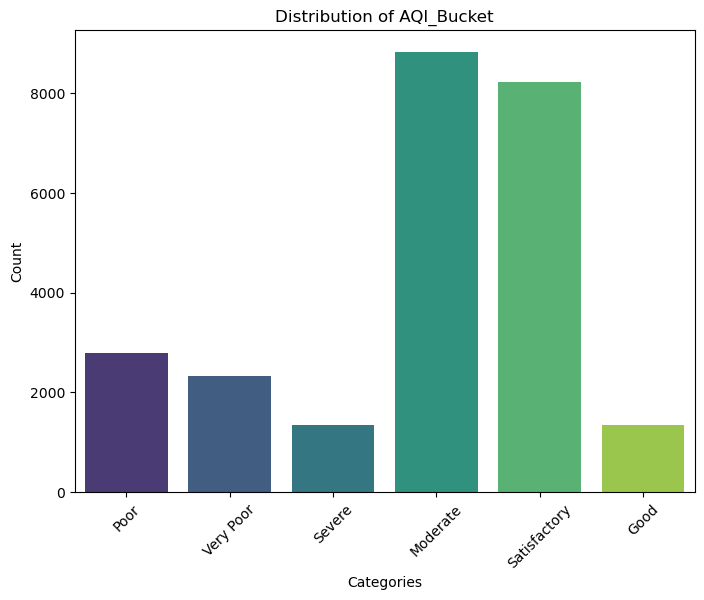

In [38]:
# Assuming df is your DataFrame and 'categorical_column' is the categorical column
plt.figure(figsize=(8, 6))

# Plot bar plot
sns.countplot(x='AQI_Bucket', data=df, palette='viridis')

plt.title('Distribution of AQI_Bucket')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Missing Values Analysis

In [42]:
def systematic_sample(df, size):
    length = len(df)
    interval = length // size
    rd.seed(None)
    first = rd.randint(0, interval)
    indexes = np.arange(first, length, step = interval)
    return df.iloc[indexes]

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [43]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Xylene,15372,61.900
PM10,7086,28.500
NH3,6536,26.300
Toluene,5826,23.400
Benzene,3535,14.200
NOx,1857,7.500
O3,807,3.200
PM2.5,678,2.700
SO2,605,2.400
CO,445,1.800


<Axes: >

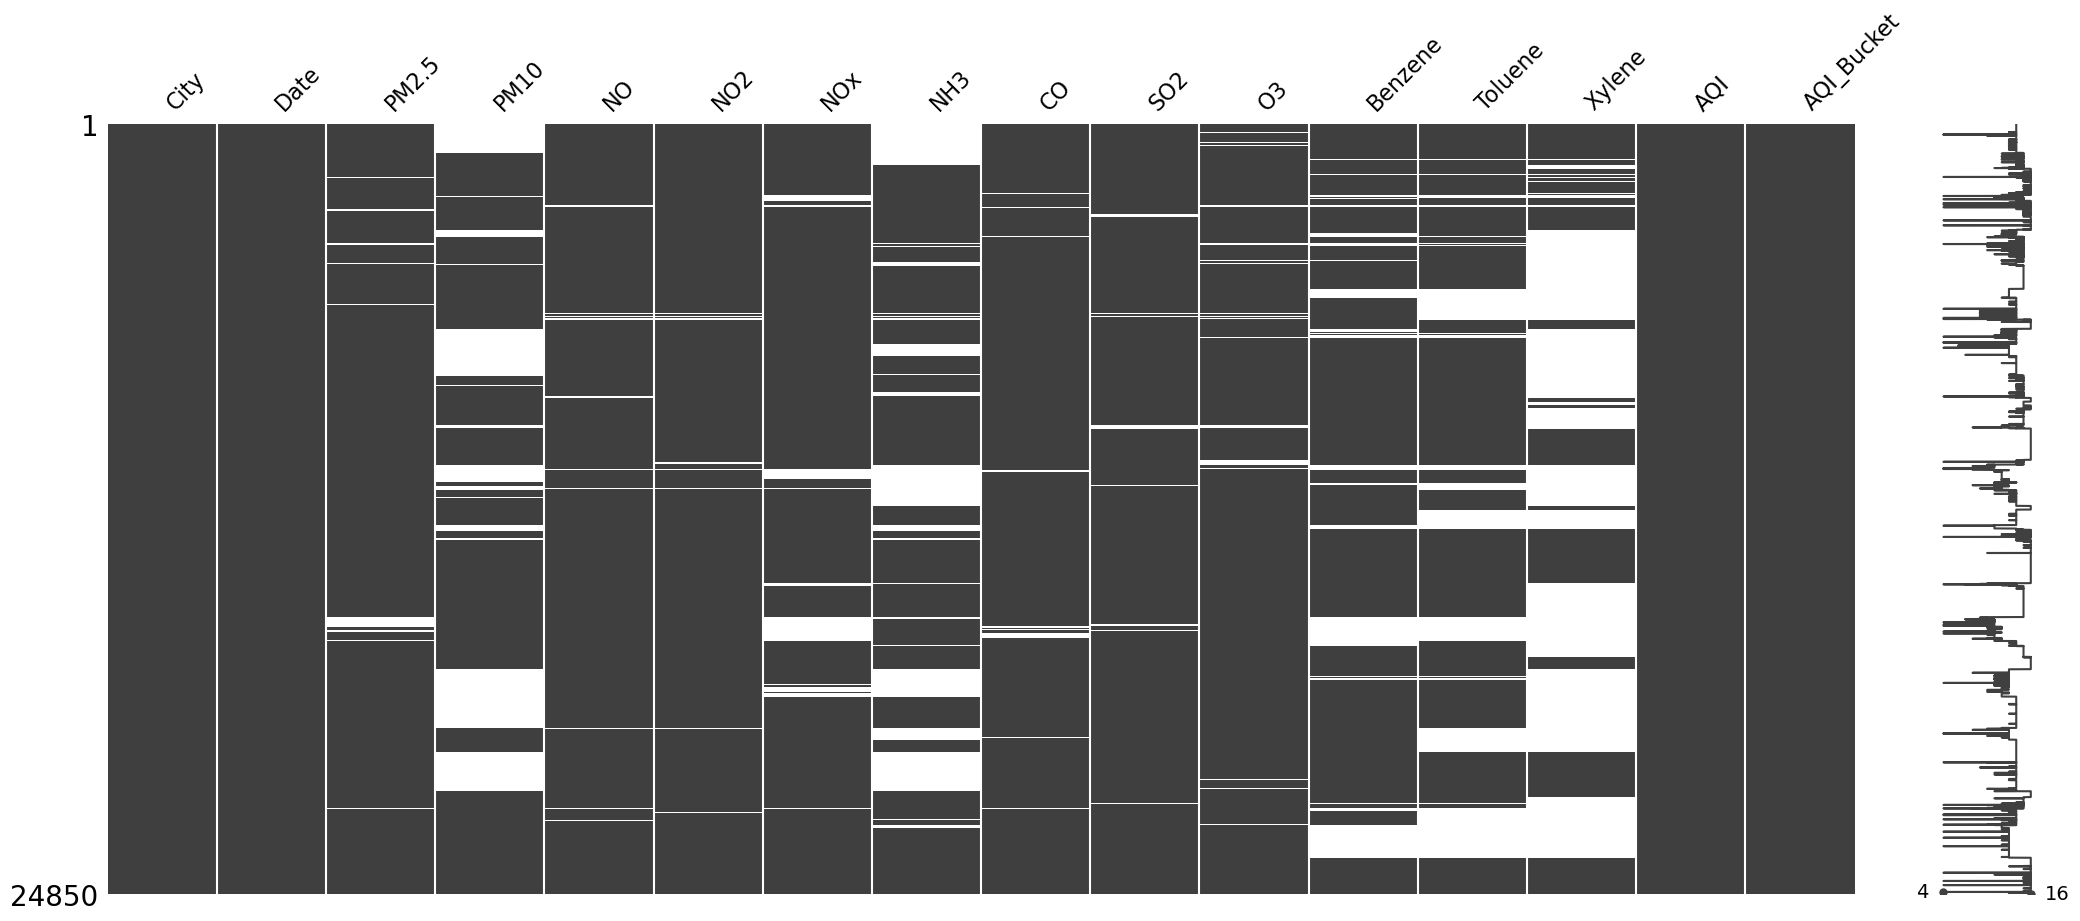

In [45]:
msno.matrix(df)

<Axes: >

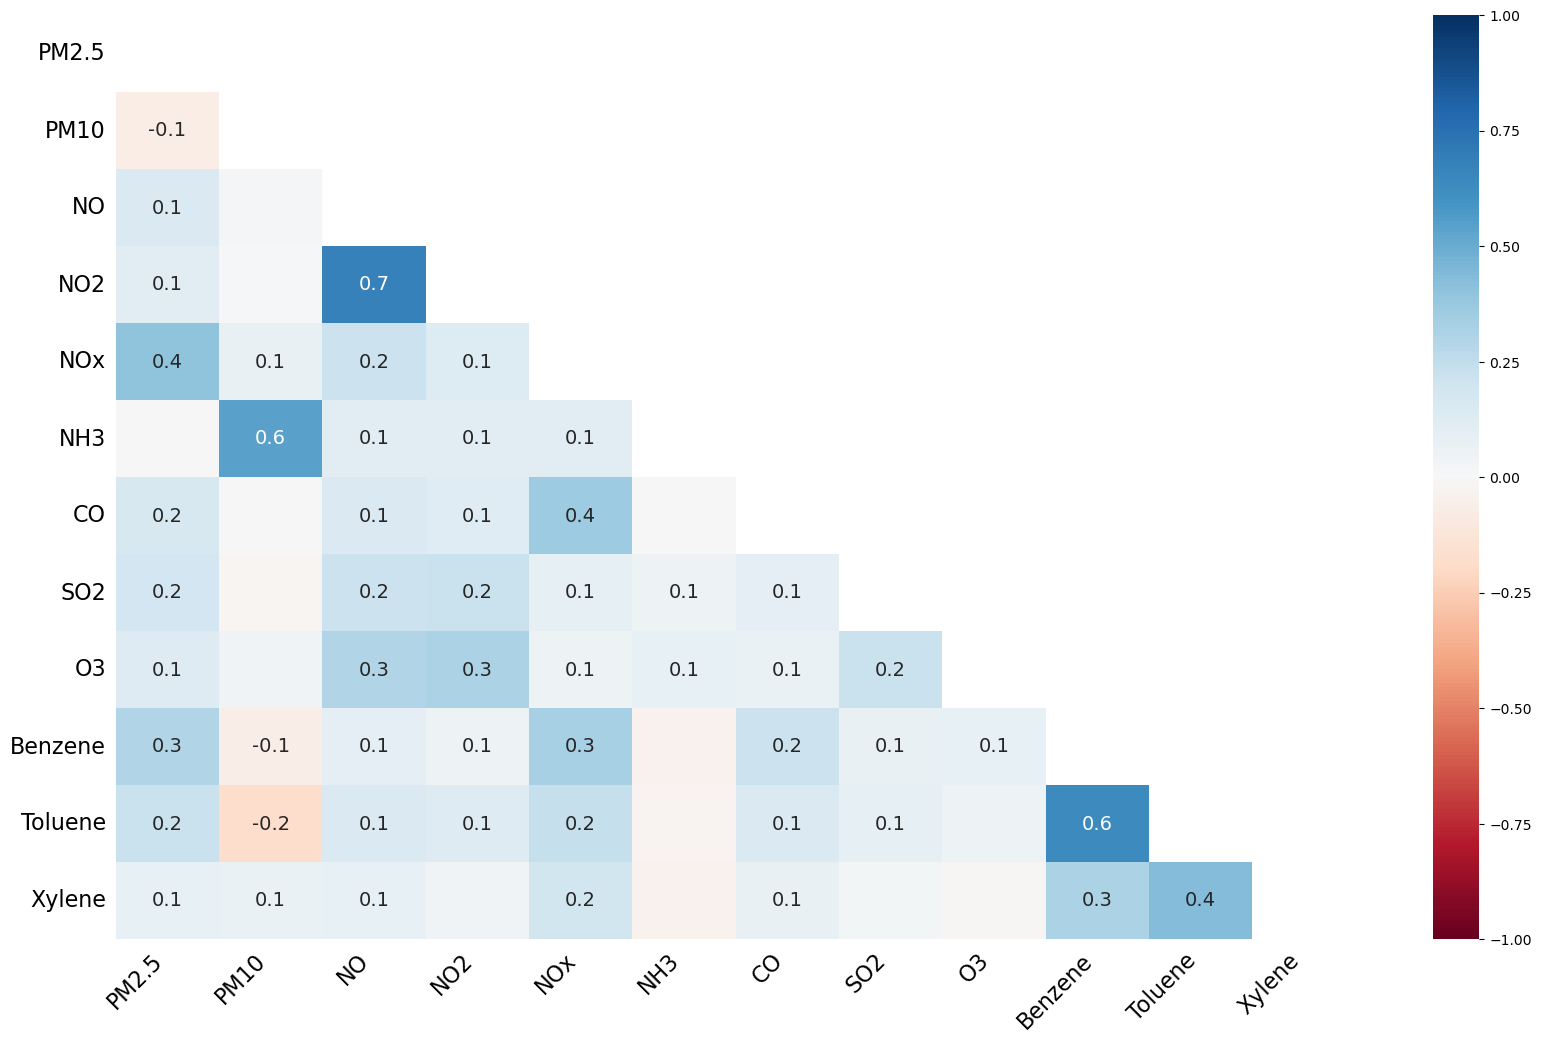

In [46]:
msno.heatmap(df)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [61]:
#Master Function of Missing Values 
city_list = list(df['City'].unique())
column_list = list(df.columns)

significance_matrix_df = pd.DataFrame(index=city_list, columns=column_list)
significance_matrix_df = significance_matrix_df.drop(columns=['City','Date','AQI','AQI_Bucket'])

grouped_df = df.groupby('City')
category_dfs = {name: group for name, group in grouped_df}

for i in city_list:
    city_df = category_dfs[i]
    iter = missing_values_table(city_df)
    missing_value_table_index_list = list(iter.index)
    
    useless_columns=[]
    for k in range(len(iter['% of Total Values'])):
        if iter['% of Total Values'][k]==100:
            useless_columns.append(iter.index[k])
    
    if useless_columns:
        for l in useless_columns:
            city_df = city_df.drop(columns=[l])
            significance_matrix_df[l][i]='No'
    else:
        pass
    
    for j in missing_value_table_index_list:
        if j not in useless_columns:
            city_column_df = city_df.dropna(subset=[j])
            city_column_df = city_column_df.drop(columns=['City', 'Date', 'AQI_Bucket'])
            city_column_df = city_column_df.fillna(0)
            
            X = city_column_df.drop(columns=['AQI'])
            Y = city_column_df['AQI']
            
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

            # Create a linear regression model
            model = LinearRegression()

            # Fit the model on the training data
            model.fit(X_train, y_train)
            
            X_train_with_const = sm.add_constant(X_train)

            # Fit a linear regression model using statsmodels
            model_statsmodels = sm.OLS(y_train, X_train_with_const).fit()
            
            #Perform the Hypothesis Test
            # Define the hypothesis matrix
            hypothesis_matrix = j+' = 0'

            # Perform the Wald test
            wald_test_result = model_statsmodels.wald_test(hypothesis_matrix)
            p_value = wald_test_result.pvalue.item()
            
            if p_value <= 0.05:
                significance_matrix_df[j][i]='Yes'
            else:
                significance_matrix_df[j][i]='No'

significance_matrix_df = significance_matrix_df.fillna('Yes')

Your selected dataframe has 16 columns.
There are 12 columns that have missing values.
Your selected dataframe has 16 columns.
There are 6 columns that have missing values.
Your selected dataframe has 16 columns.
There are 12 columns that have missing values.
Your selected dataframe has 16 columns.
There are 12 columns that have missing values.
Your selected dataframe has 16 columns.
There are 12 columns that have missing values.
Your selected dataframe has 16 columns.
There are 3 columns that have missing values.
Your selected dataframe has 16 columns.
There are 12 columns that have missing values.
Your selected dataframe has 16 columns.
There are 5 columns that have missing values.
Your selected dataframe has 16 columns.
There are 12 columns that have missing values.
Your selected dataframe has 16 columns.
There are 12 columns that have missing values.
Your selected dataframe has 16 columns.
There are 8 columns that have missing values.
Your selected dataframe has 16 columns.
There a

/Users/shreyashkalal/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '


In [63]:
significance_matrix_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
Ahmedabad,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,No
Aizawl,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
Amaravati,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No
Amritsar,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No
Bengaluru,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No
Bhopal,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
Brajrajnagar,Yes,No,No,No,No,No,Yes,No,No,No,No,No
Chandigarh,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes
Chennai,Yes,Yes,No,Yes,No,No,Yes,No,Yes,No,No,No
Coimbatore,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
